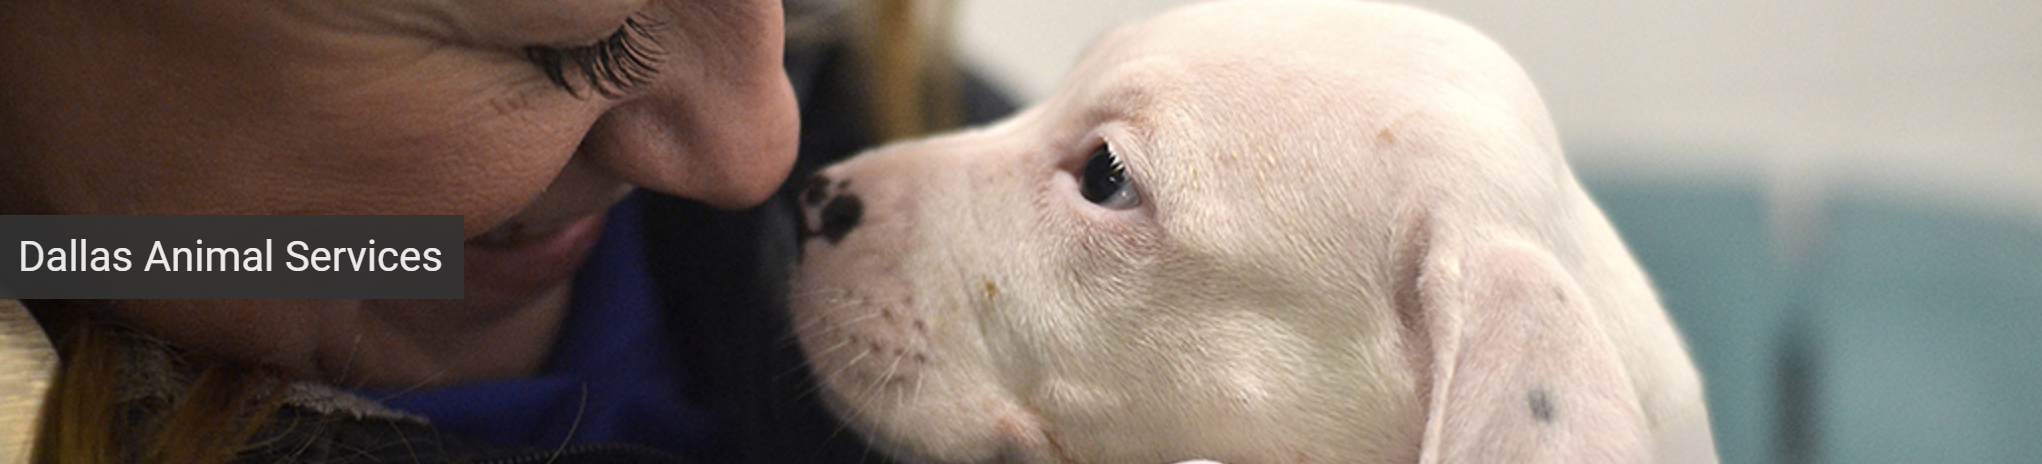

## Utilizing Classification Algorithms for Animal Shelter Resource Allocation

### Introduction:
In this project we will use classification algorithms for optimizing resource allocation at the Dallas Animal Shelter. At DS Pros, we believe that data-driven approaches can significantly enhance animal welfare initiatives, leading to better outcomes for shelter animals and the community.

- Data source: "Dallas Animal Shelter Data Fiscal Year 2023 - 2024", https://www.dallasopendata.com/Services/Dallas-Animal-Shelter-Data-Fiscal-Year-2023-2024/uyte-zi7f/about_data

### Objective:
Our objective is to demonstrate how classification algorithms can be applied to predict the outcome of animals entering the shelter system, thereby facilitating proactive resource allocation and decision-making.

### Problem Statement:
Animal shelters face numerous challenges, including limited resources and capacity constraints. Efficiently managing these resources while maximizing positive outcomes for animals is essential. By accurately predicting the outcomes of animals upon intake, shelters can better allocate resources such as staff time, medical care, and adoption efforts.

### Proposed Solution:
We propose a solution that utilizes classification algorithms to predict the outcomes of animals entering the Dallas Animal Shelter. By analyzing the data on animal characteristics, intake circumstances, and previous outcomes, we can develop a predictive model that identifies the likely outcome for each animal. This proactive approach enables the shelter to allocate resources more effectively, prioritize interventions, and improve overall animal welfare.

### Step 1: Data Loading and Exploration

In [183]:
#Imporing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
%matplotlib inline

In [186]:
# Reload the dataset with dtype specification and low_memory=False
df = pd.read_csv('Dallas_Animal_Shelter_Data_Fiscal_Year_2023_-_2024_20240501.csv', dtype={'Chip_Status': str}, low_memory=False)
df.head()

,Animal_Id,Animal_Type,Animal_Breed,Kennel_Number,Kennel_Status,Tag_Type,Activity_Number,Activity_Sequence,Source_Id,Census_Tract,...,Outcome_Time,Receipt_Number,Impound_Number,Service_Request_Number,Outcome_Condition,Chip_Status,Animal_Origin,Additional_Information,Month,Year
0,A0011910,DOG,PIT BULL,RESC FOST,UNAVAILABLE,NaN,A23-412044,1,P9998533,4900.0,...,11:27:00,NaN,K23-609562,NaN,APP SICK,SCAN NO CHIP,FIELD,NaN,DEC.2023,FY2024
1,A0011910,DOG,PIT BULL,DC 24,AVAILABLE,NaN,A23-412044,1,P0737656,NaN,...,16:07:00,NaN,K24-615492,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,RGE,FEB.2024,FY2024
2,A0620193,DOG,GERM SHEPHERD,VT 01,IMPOUNDED,NaN,A24-428512,1,P1084448,6502.0,...,16:21:00,NaN,K24-619833,NaN,APP INJ,SCAN CHIP,FIELD,NaN,MAR.2024,FY2024
3,A0621895,DOG,GERM SHEPHERD,LFD 008,AVAILABLE,NaN,NaN,1,P0902215,NaN,...,12:07:00,NaN,K23-609093,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,NaN,DEC.2023,FY2024
4,A0654166,DOG,SHEPHERD,136049-01,IMPOUNDED,NaN,A24-419706,1,P1077594,16511.0,...,02:25:00,NaN,K24-614249,NaN,APP SICK,SCAN CHIP,FIELD,NaN,FEB.2024,FY2024


### Checking Missing Data

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22702 entries, 0 to 22701
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Animal_Id               22702 non-null  object 
 1   Animal_Type             22702 non-null  object 
 2   Animal_Breed            22692 non-null  object 
 3   Kennel_Number           22702 non-null  object 
 4   Kennel_Status           22702 non-null  object 
 5   Tag_Type                0 non-null      float64
 6   Activity_Number         9251 non-null   object 
 7   Activity_Sequence       22702 non-null  int64  
 8   Source_Id               22702 non-null  object 
 9   Census_Tract            13797 non-null  float64
 10  Council_District        13797 non-null  float64
 11  Intake_Type             22702 non-null  object 
 12  Intake_Subtype          22702 non-null  object 
 13  Intake_Total            22702 non-null  int64  
 14  Reason                  20605 non-null

In [188]:
missing_percentage = df.isnull().mean() * 100

sorted_missing_percentage = missing_percentage.sort_values(ascending=False)

print("Percentage of missing values for each column, sorted in descending order:")
sorted_missing_percentage

Percentage of missing values for each column, sorted in descending order:


Tag_Type                  100.000000
Service_Request_Number     99.942736
Additional_Information     80.631662
Receipt_Number             69.280240
Activity_Number            59.250286
Council_District           39.225619
Census_Tract               39.225619
Hold_Request               25.081491
Outcome_Condition          14.888556
Animal_Origin               9.237072
Chip_Status                 9.237072
Reason                      9.237072
Outcome_Date                6.990574
Animal_Breed                0.044049
Outcome_Time                0.000000
Outcome_Subtype             0.000000
Animal_Id                   0.000000
Impound_Number              0.000000
Month                       0.000000
Outcome_Type                0.000000
Intake_Time                 0.000000
Intake_Condition            0.000000
Due_Out                     0.000000
Animal_Type                 0.000000
Intake_Date                 0.000000
Staff_Id                    0.000000
Intake_Total                0.000000
I

#### There are several columns with a significant number of missing values which will require attention before modeling:

- Tag_Type: Completely missing (0 non-null values). This column should be dropped as it provides no information.
- Activity_Number: Over half the entries are missing. The column can be dropped.
- Census_Tract, Council_District: Both have about 39% missing values. If geographical information is critical, consider imputation; otherwise, consider dropping.
- Hold_Request: 25% missing. Imputing this with a default value like "No Hold" or similar can be helpful.
- Outcome_Date: 7% missing. Depending on the model's needs, imputation (e.g., using the mode or median of known outcome dates) or deletion might be necessary.
- Outcome_Condition, Chip_Status, Animal_Origin: All have similar amounts of missing data (~9%). A default imputation like 'Unknown' or mode can be applied.
- Receipt_Number, Service_Request_Number, Additional_Information: High levels of missing data. Likely candidates for removal unless specific elements are crucial for analysis or model predictions.

#### Irrelevant or Redundant Columns
- Animal_Id, Kennel_Number, Impound_Number: Typically, identifiers like these are not useful for predictive modeling unless there is a context-specific reason to include them.
Service_Request_Number: Almost entirely missing and likely not useful.

In [189]:
df.describe()

,Tag_Type,Activity_Sequence,Census_Tract,Council_District,Intake_Total
count,0.0,22702.000000,13797.000000,13797.000000,22702.0
mean,NaN,0.974540,11638.524969,6.134739,1.0
std,NaN,0.589218,27914.726608,3.090316,0.0
min,NaN,0.000000,0.000000,-5.000000,1.0
25%,NaN,1.000000,6800.000000,4.000000,1.0
50%,NaN,1.000000,10701.000000,6.000000,1.0
75%,NaN,1.000000,13500.000000,8.000000,1.0
max,NaN,16.000000,980100.000000,80.000000,1.0


In [190]:
df.nunique()

Animal_Id                 18713
Animal_Type                   5
Animal_Breed                213
Kennel_Number              1509
Kennel_Status                 9
Tag_Type                      0
Activity_Number            5041
Activity_Sequence            15
Source_Id                 11019
Census_Tract                306
Council_District             18
Intake_Type                  11
Intake_Subtype               43
Intake_Total                  1
Reason                       14
Staff_Id                    194
Intake_Date                 213
Intake_Time                1147
Due_Out                     246
Intake_Condition              9
Hold_Request                 16
Outcome_Type                 16
Outcome_Subtype              47
Outcome_Date                216
Outcome_Time                998
Receipt_Number             6920
Impound_Number            22702
Service_Request_Number       10
Outcome_Condition             8
Chip_Status                   4
Animal_Origin                 7
Addition

### Strategy for Handling Missing Data:

- Drop columns with very high percentages of missing values (greater than 50%).
- Impute missing values in columns that are potentially useful and have less than 50% missing data. The method of imputation may vary based on whether the data is categorical or numerical.

We can drop the following columns: "Animal_Id", "Kennel_Number", "Kennel_Status", "Tag_Type", "Activity_Number", "Activity_Sequence", "Source_Id","Staff_Id", "Impound_Number", "Service_Request_Number", "Receipt_Number", "Additional_Information" and "Intake_Total".

They either do not contribute meaningfully to predicting the outcome of animals in the shelter or missing a significant amount of values.

In [191]:
# Drop columns with any missing values
df_shelter = df.drop(columns=['Animal_Id', 'Kennel_Number', 'Kennel_Status', 'Activity_Sequence','Tag_Type', 'Activity_Number', 'Intake_Total', 'Receipt_Number', 'Service_Request_Number', 'Additional_Information', 'Impound_Number', 'Source_Id','Staff_Id', 'Census_Tract', 'Council_District'])
df_shelter.head()

,Animal_Type,Animal_Breed,Intake_Type,Intake_Subtype,Reason,Intake_Date,Intake_Time,Due_Out,Intake_Condition,Hold_Request,Outcome_Type,Outcome_Subtype,Outcome_Date,Outcome_Time,Outcome_Condition,Chip_Status,Animal_Origin,Month,Year
0,DOG,PIT BULL,STRAY,CONFINED,OTHRINTAKS,12/21/2023,20:07:00,12/25/2023,APP WNL,EMERGENCY RESCUE,TRANSFER,MEDICAL,01/09/2024,11:27:00,APP SICK,SCAN NO CHIP,FIELD,DEC.2023,FY2024
1,DOG,PIT BULL,TREATMENT,SPAY/NEUT,SURGERY,02/19/2024,09:29:00,02/19/2024,APP WNL,EMERGENCY RESCUE,TREATMENT,COMPLETED,02/19/2024,16:07:00,APP WNL,SCAN CHIP,OVER THE COUNTER,FEB.2024,FY2024
2,DOG,GERM SHEPHERD,OWNER SURRENDER,URGENT,OTHRINTAKS,03/29/2024,14:52:00,04/02/2024,APP INJ,NaN,EUTHANIZED,HUMANE,03/29/2024,16:21:00,APP INJ,SCAN CHIP,FIELD,MAR.2024,FY2024
3,DOG,GERM SHEPHERD,OWNER SURRENDER,APPOINT,PERSNLISSU,12/15/2023,13:21:00,12/15/2023,APP WNL,ADOP RESCU,TRANSFER,GENERAL,12/16/2023,12:07:00,APP WNL,SCAN CHIP,OVER THE COUNTER,DEC.2023,FY2024
4,DOG,SHEPHERD,OWNER SURRENDER,URGENT,MEDICAL,02/07/2024,01:03:00,02/07/2024,APP INJ,NaN,EUTHANIZED,MEDICAL,02/07/2024,02:25:00,APP SICK,SCAN CHIP,FIELD,FEB.2024,FY2024


In [192]:
missing_percentage = df_shelter.isnull().mean() * 100

print("Percentage of missing values for each column:")
missing_percentage

Percentage of missing values for each column:


Animal_Type           0.000000
Animal_Breed          0.044049
Intake_Type           0.000000
Intake_Subtype        0.000000
Reason                9.237072
Intake_Date           0.000000
Intake_Time           0.000000
Due_Out               0.000000
Intake_Condition      0.000000
Hold_Request         25.081491
Outcome_Type          0.000000
Outcome_Subtype       0.000000
Outcome_Date          6.990574
Outcome_Time          0.000000
Outcome_Condition    14.888556
Chip_Status           9.237072
Animal_Origin         9.237072
Month                 0.000000
Year                  0.000000
dtype: float64

In [195]:
# Fill categorical missing values with the mode
categorical_columns = ['Animal_Breed', 'Reason', 'Chip_Status', 'Animal_Origin', 'Hold_Request', 'Outcome_Condition']
for column in categorical_columns:
    df_shelter[column] = df_shelter[column].fillna(df_shelter[column].mode()[0])

# Ensure 'Outcome_Date' is in datetime format and forward fill missing dates
df_shelter['Outcome_Date'] = pd.to_datetime(df_shelter['Outcome_Date']).ffill()

print(df_shelter.isnull().sum())
df_shelter.head()

Animal_Type          0
Animal_Breed         0
Intake_Type          0
Intake_Subtype       0
Reason               0
Intake_Date          0
Intake_Time          0
Due_Out              0
Intake_Condition     0
Hold_Request         0
Outcome_Type         0
Outcome_Subtype      0
Outcome_Date         0
Outcome_Time         0
Outcome_Condition    0
Chip_Status          0
Animal_Origin        0
Month                0
Year                 0
dtype: int64


,Animal_Type,Animal_Breed,Intake_Type,Intake_Subtype,Reason,Intake_Date,Intake_Time,Due_Out,Intake_Condition,Hold_Request,Outcome_Type,Outcome_Subtype,Outcome_Date,Outcome_Time,Outcome_Condition,Chip_Status,Animal_Origin,Month,Year
0,DOG,PIT BULL,STRAY,CONFINED,OTHRINTAKS,12/21/2023,20:07:00,12/25/2023,APP WNL,EMERGENCY RESCUE,TRANSFER,MEDICAL,2024-01-09,11:27:00,APP SICK,SCAN NO CHIP,FIELD,DEC.2023,FY2024
1,DOG,PIT BULL,TREATMENT,SPAY/NEUT,SURGERY,02/19/2024,09:29:00,02/19/2024,APP WNL,EMERGENCY RESCUE,TREATMENT,COMPLETED,2024-02-19,16:07:00,APP WNL,SCAN CHIP,OVER THE COUNTER,FEB.2024,FY2024
2,DOG,GERM SHEPHERD,OWNER SURRENDER,URGENT,OTHRINTAKS,03/29/2024,14:52:00,04/02/2024,APP INJ,ADOP RESCU,EUTHANIZED,HUMANE,2024-03-29,16:21:00,APP INJ,SCAN CHIP,FIELD,MAR.2024,FY2024
3,DOG,GERM SHEPHERD,OWNER SURRENDER,APPOINT,PERSNLISSU,12/15/2023,13:21:00,12/15/2023,APP WNL,ADOP RESCU,TRANSFER,GENERAL,2023-12-16,12:07:00,APP WNL,SCAN CHIP,OVER THE COUNTER,DEC.2023,FY2024
4,DOG,SHEPHERD,OWNER SURRENDER,URGENT,MEDICAL,02/07/2024,01:03:00,02/07/2024,APP INJ,ADOP RESCU,EUTHANIZED,MEDICAL,2024-02-07,02:25:00,APP SICK,SCAN CHIP,FIELD,FEB.2024,FY2024


In [196]:
df_shelter.columns

Index(['Animal_Type', 'Animal_Breed', 'Intake_Type', 'Intake_Subtype',
       'Reason', 'Intake_Date', 'Intake_Time', 'Due_Out', 'Intake_Condition',
       'Hold_Request', 'Outcome_Type', 'Outcome_Subtype', 'Outcome_Date',
       'Outcome_Time', 'Outcome_Condition', 'Chip_Status', 'Animal_Origin',
       'Month', 'Year'],
      dtype='object')

## EDA

### Distribution of Animal Types in the Shelter

In [197]:
# Calculate the count of each animal type
animal_type_counts = df_shelter['Animal_Type'].value_counts()

# Calculate the proportion of each animal type
animal_type_proportions = df_shelter['Animal_Type'].value_counts(normalize=True) * 100

print("Counts of Each Animal Type:")
print(animal_type_counts)
print("\nProportions of Each Animal Type (%):")
print(animal_type_proportions)

Counts of Each Animal Type:
Animal_Type
DOG          15845
CAT           4407
BIRD          1684
WILDLIFE       750
LIVESTOCK       16
Name: count, dtype: int64

Proportions of Each Animal Type (%):
Animal_Type
DOG          69.795613
CAT          19.412387
BIRD          7.417849
WILDLIFE      3.303674
LIVESTOCK     0.070478
Name: proportion, dtype: float64


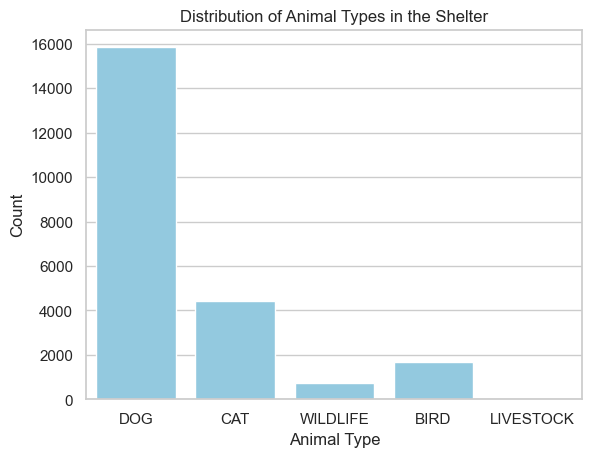

In [198]:
sns.countplot(data=df_shelter, x='Animal_Type', color='skyblue')
plt.title('Distribution of Animal Types in the Shelter')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

Overwhelming majority of animals in the shelter are dogs

### Let's see the Top 10 Dog Breeds in the Shelter

C:\Users\user\AppData\Local\Temp\ipykernel_15628\2108104751.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_breeds.index, y=top_breeds.values, palette='viridis')


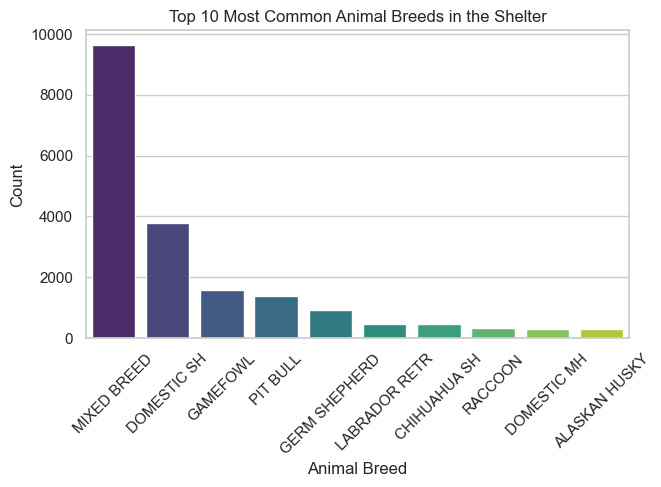

In [199]:
top_breeds = df_shelter['Animal_Breed'].value_counts().nlargest(10)

plt.figure(figsize=(7, 4))
sns.barplot(x=top_breeds.index, y=top_breeds.values, palette='viridis')

plt.title('Top 10 Most Common Animal Breeds in the Shelter')
plt.xlabel('Animal Breed')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

Mixed Breed is the most common, followed by Domestic SH and Gamefowl.

### Distribution of Outcomes at the Shelter

C:\Users\user\AppData\Local\Temp\ipykernel_15628\645411155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='muted')


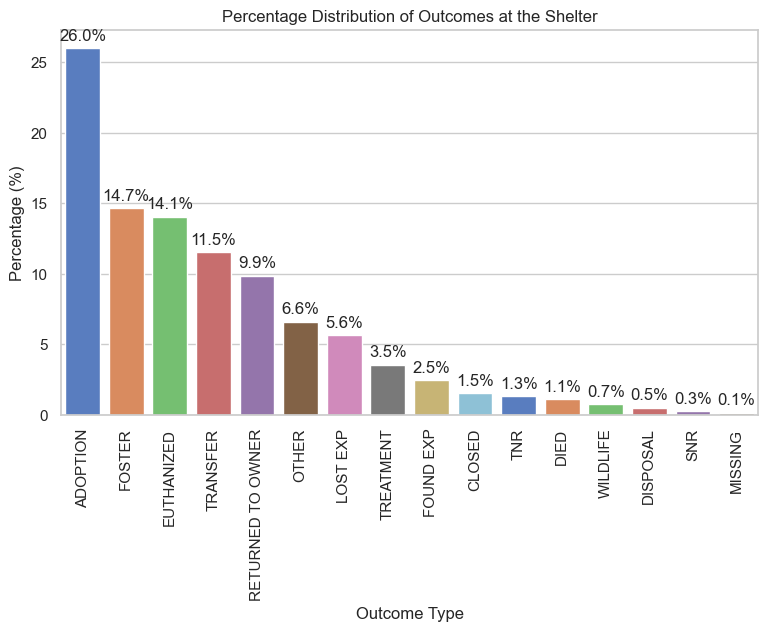

In [200]:
outcome_counts = df_shelter['Outcome_Type'].value_counts(normalize=True) * 100

sns.set(style="whitegrid")

plt.figure(figsize=(9, 5))
ax = sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='muted')

plt.title('Percentage Distribution of Outcomes at the Shelter')
plt.xlabel('Outcome Type')
plt.ylabel('Percentage (%)')

plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center',  
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

Around 40% of all animals in the shelter are adopted or fostered followed by 14,1 % euthanized

### Chip Status Distribution

C:\Users\user\AppData\Local\Temp\ipykernel_15628\3671382556.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=chip_status_counts.index, y=chip_status_counts.values, palette='viridis')


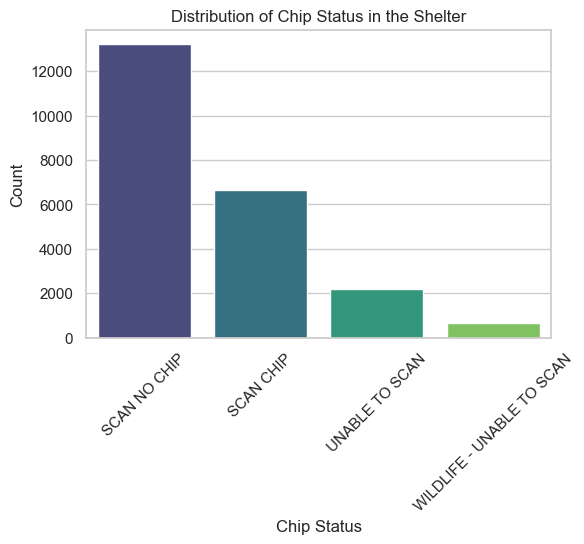

In [201]:
chip_status_counts = df_shelter['Chip_Status'].value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=chip_status_counts.index, y=chip_status_counts.values, palette='viridis')

plt.title('Distribution of Chip Status in the Shelter')
plt.xlabel('Chip Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Intake Reasons Distribution

C:\Users\user\AppData\Local\Temp\ipykernel_15628\2456751074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_shelter, x='Reason', palette='pastel')


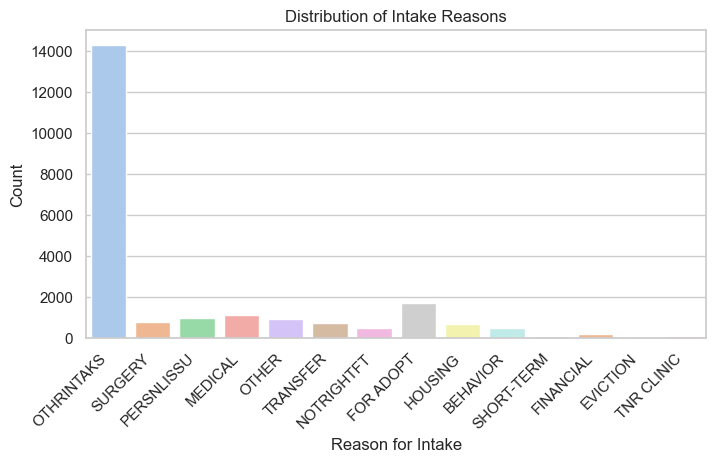

In [202]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_shelter, x='Reason', palette='pastel')
plt.title('Distribution of Intake Reasons')
plt.xlabel('Reason for Intake')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

The majority of the intake reasons fall under the category "Other Intake Reasons", which likely groups various unspecified reasons.

### Temporal trends in animal intakes and outcomes.

In [203]:
df_shelter['Intake_Date'] = pd.to_datetime(df_shelter['Intake_Date'], errors='coerce')
df_shelter['Outcome_Date'] = pd.to_datetime(df_shelter['Outcome_Date'], errors='coerce')

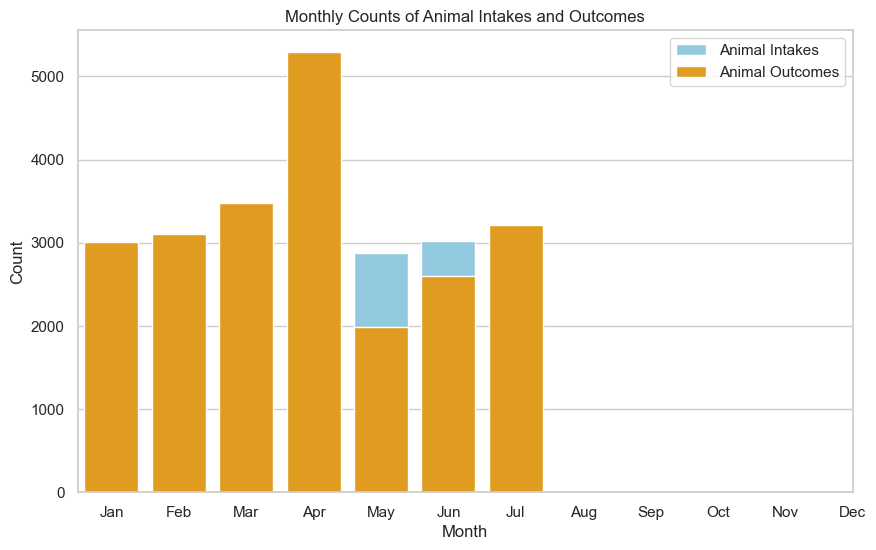

In [204]:
df_shelter['Intake_Month'] = df_shelter['Intake_Date'].dt.month
df_shelter['Outcome_Month'] = df_shelter['Outcome_Date'].dt.month

# Group by month and count the number of intakes and outcomes
intake_counts = df_shelter['Intake_Month'].value_counts().sort_index()
outcome_counts = df_shelter['Outcome_Month'].value_counts().sort_index()

# Create a bar plot for intakes and outcomes by month
plt.figure(figsize=(10, 6))
sns.barplot(x=intake_counts.index, y=intake_counts.values, color='skyblue', label='Animal Intakes')
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, color='orange', label='Animal Outcomes')
plt.title('Monthly Counts of Animal Intakes and Outcomes')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

As we can see in the Fiscal Year 2023 - 2024 the highet number of outcomes happened in April, while animal intakes took place in May and June. No data is available from August until December.

## Data Transformation

## Feature Engineering

In [205]:
# Convert dates to datetime
df_shelter['Intake_Date'] = pd.to_datetime(df_shelter['Intake_Date'])
df_shelter['Outcome_Date'] = pd.to_datetime(df_shelter['Outcome_Date'])

# Calculate the duration of stay
df_shelter['Duration_of_Stay'] = (df_shelter['Outcome_Date'] - df_shelter['Intake_Date']).dt.days

print(df_shelter[['Intake_Date', 'Outcome_Date', 'Duration_of_Stay']].head())

  Intake_Date Outcome_Date  Duration_of_Stay
0  2023-12-21   2024-01-09                19
1  2024-02-19   2024-02-19                 0
2  2024-03-29   2024-03-29                 0
3  2023-12-15   2023-12-16                 1
4  2024-02-07   2024-02-07                 0


### Median duration of stay by Animal Type

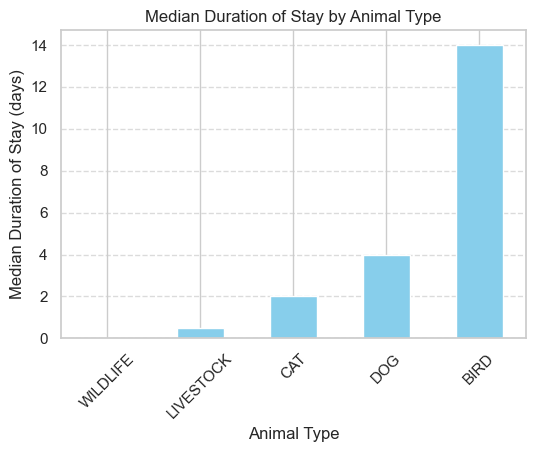

In [206]:
animal_type_duration = df_shelter.groupby('Animal_Type')['Duration_of_Stay'].median().sort_values()

plt.figure(figsize=(6, 4))
animal_type_duration.plot(kind='bar', color='skyblue')
plt.title('Median Duration of Stay by Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Median Duration of Stay (days)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [207]:
df_shelter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22702 entries, 0 to 22701
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Animal_Type        22702 non-null  object        
 1   Animal_Breed       22702 non-null  object        
 2   Intake_Type        22702 non-null  object        
 3   Intake_Subtype     22702 non-null  object        
 4   Reason             22702 non-null  object        
 5   Intake_Date        22702 non-null  datetime64[ns]
 6   Intake_Time        22702 non-null  object        
 7   Due_Out            22702 non-null  object        
 8   Intake_Condition   22702 non-null  object        
 9   Hold_Request       22702 non-null  object        
 10  Outcome_Type       22702 non-null  object        
 11  Outcome_Subtype    22702 non-null  object        
 12  Outcome_Date       22702 non-null  datetime64[ns]
 13  Outcome_Time       22702 non-null  object        
 14  Outcom

In [208]:
# Drop unnecessary date and time columns
columns_to_drop = ['Intake_Date', 'Intake_Time', 'Outcome_Date', 'Outcome_Time', 'Due_Out', 'Month','Year', 'Intake_Month', 'Outcome_Month']

df_shelter.drop(columns=columns_to_drop, inplace=True)
df_shelter.head()

,Animal_Type,Animal_Breed,Intake_Type,Intake_Subtype,Reason,Intake_Condition,Hold_Request,Outcome_Type,Outcome_Subtype,Outcome_Condition,Chip_Status,Animal_Origin,Duration_of_Stay
0,DOG,PIT BULL,STRAY,CONFINED,OTHRINTAKS,APP WNL,EMERGENCY RESCUE,TRANSFER,MEDICAL,APP SICK,SCAN NO CHIP,FIELD,19
1,DOG,PIT BULL,TREATMENT,SPAY/NEUT,SURGERY,APP WNL,EMERGENCY RESCUE,TREATMENT,COMPLETED,APP WNL,SCAN CHIP,OVER THE COUNTER,0
2,DOG,GERM SHEPHERD,OWNER SURRENDER,URGENT,OTHRINTAKS,APP INJ,ADOP RESCU,EUTHANIZED,HUMANE,APP INJ,SCAN CHIP,FIELD,0
3,DOG,GERM SHEPHERD,OWNER SURRENDER,APPOINT,PERSNLISSU,APP WNL,ADOP RESCU,TRANSFER,GENERAL,APP WNL,SCAN CHIP,OVER THE COUNTER,1
4,DOG,SHEPHERD,OWNER SURRENDER,URGENT,MEDICAL,APP INJ,ADOP RESCU,EUTHANIZED,MEDICAL,APP SICK,SCAN CHIP,FIELD,0


### Splitting the Data into Training and Testing Sets

In [209]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df_shelter.drop(columns=['Outcome_Type'])  # Features
y = df_shelter['Outcome_Type']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (18161, 12) (18161,)
Testing set shape: (4541, 12) (4541,)


### One-hot Encoding of Categorical Variables

In [210]:
# Perform one-hot encoding on categorical variables only on training data
X_train_encoded = pd.get_dummies(X_train, columns=['Animal_Type', 'Animal_Breed', 'Intake_Type', 'Intake_Subtype', 
                                                   'Reason','Intake_Condition', 'Hold_Request', 'Outcome_Subtype', 
                                                   'Outcome_Condition', 'Chip_Status',  'Animal_Origin'])
                                             
                                                  
# Apply the same transformation to the test data
X_test_encoded = pd.get_dummies(X_test, columns=['Animal_Type', 'Animal_Breed', 'Intake_Type', 'Intake_Subtype', 
                                                 'Reason','Intake_Condition', 'Hold_Request', 'Outcome_Subtype', 
                                                  'Outcome_Condition', 'Chip_Status',  'Animal_Origin'])
                                               
# Ensure that the test set has the same features as the training set, adding missing columns with 0s
X_test_encoded = X_test_encoded.reindex(columns = X_train_encoded.columns, fill_value=0)

X_train_encoded.head()

,Duration_of_Stay,Animal_Type_BIRD,Animal_Type_CAT,Animal_Type_DOG,Animal_Type_LIVESTOCK,Animal_Type_WILDLIFE,Animal_Breed_AFFENPINSCHER,Animal_Breed_AFGHAN HOUND,Animal_Breed_AKITA,Animal_Breed_ALASK MALAMUTE,...,Chip_Status_SCAN NO CHIP,Chip_Status_UNABLE TO SCAN,Chip_Status_WILDLIFE - UNABLE TO SCAN,Animal_Origin_AGGOPS,Animal_Origin_BITE,Animal_Origin_COM CAT,Animal_Origin_FIELD,Animal_Origin_HART,Animal_Origin_OVER THE COUNTER,Animal_Origin_PSPICKUP
11547,7,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
17464,7,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
20278,7,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2065,1,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
21407,0,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


### Scaling Numeric Variables

In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_encoded['Duration_of_Stay'] = scaler.fit_transform(X_train_encoded[['Duration_of_Stay']])
X_test_encoded['Duration_of_Stay'] = scaler.transform(X_test_encoded[['Duration_of_Stay']])

X_train_encoded

,Duration_of_Stay,Animal_Type_BIRD,Animal_Type_CAT,Animal_Type_DOG,Animal_Type_LIVESTOCK,Animal_Type_WILDLIFE,Animal_Breed_AFFENPINSCHER,Animal_Breed_AFGHAN HOUND,Animal_Breed_AKITA,Animal_Breed_ALASK MALAMUTE,...,Chip_Status_SCAN NO CHIP,Chip_Status_UNABLE TO SCAN,Chip_Status_WILDLIFE - UNABLE TO SCAN,Animal_Origin_AGGOPS,Animal_Origin_BITE,Animal_Origin_COM CAT,Animal_Origin_FIELD,Animal_Origin_HART,Animal_Origin_OVER THE COUNTER,Animal_Origin_PSPICKUP
11547,-0.094721,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
17464,-0.094721,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
20278,-0.094721,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2065,-0.512846,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
21407,-0.582534,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.582534,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
21575,-0.582534,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
5390,1.438403,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
860,-0.164409,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Define the Algorithms and Their Hyperparameters

We will analyze different classification models to determine the best approach for predicting outcomes of animals in a shelter. The dataset has been one-hot encoded, resulting in 18161 rows × 375 columns.

SMOTE was used as there is a severe class imbalance where the minority class is severely underrepresented.

PCA is used in this dataset to address the high dimensionality resulting from one-hot encoding

#### Let's start from Naive Bayes model as a baseline. 
#### Naive Bayes models are fast and simple classification algorithms, often suitable for very high-dimensional datasets.

Training GaussianNB...
Best parameters for GaussianNB: {'pca__n_components': 100}
Best cross-validation score for GaussianNB: 0.74
GaussianNB model saved successfully!


Test Accuracy for GaussianNB: 0.7524774278793217

Classification Report for GaussianNB:
                    precision    recall  f1-score   support

         ADOPTION       0.91      0.77      0.83      1177
           CLOSED       1.00      0.92      0.96        84
             DIED       0.35      0.96      0.51        54
         DISPOSAL       0.45      1.00      0.62        21
       EUTHANIZED       0.86      0.92      0.89       649
           FOSTER       0.70      0.68      0.69       657
        FOUND EXP       0.38      0.89      0.53       117
         LOST EXP       0.61      0.32      0.42       246
          MISSING       0.25      0.33      0.29         3
            OTHER       0.88      0.72      0.79       296
RETURNED TO OWNER       0.68      0.77      0.72       441
              SNR       1.00    

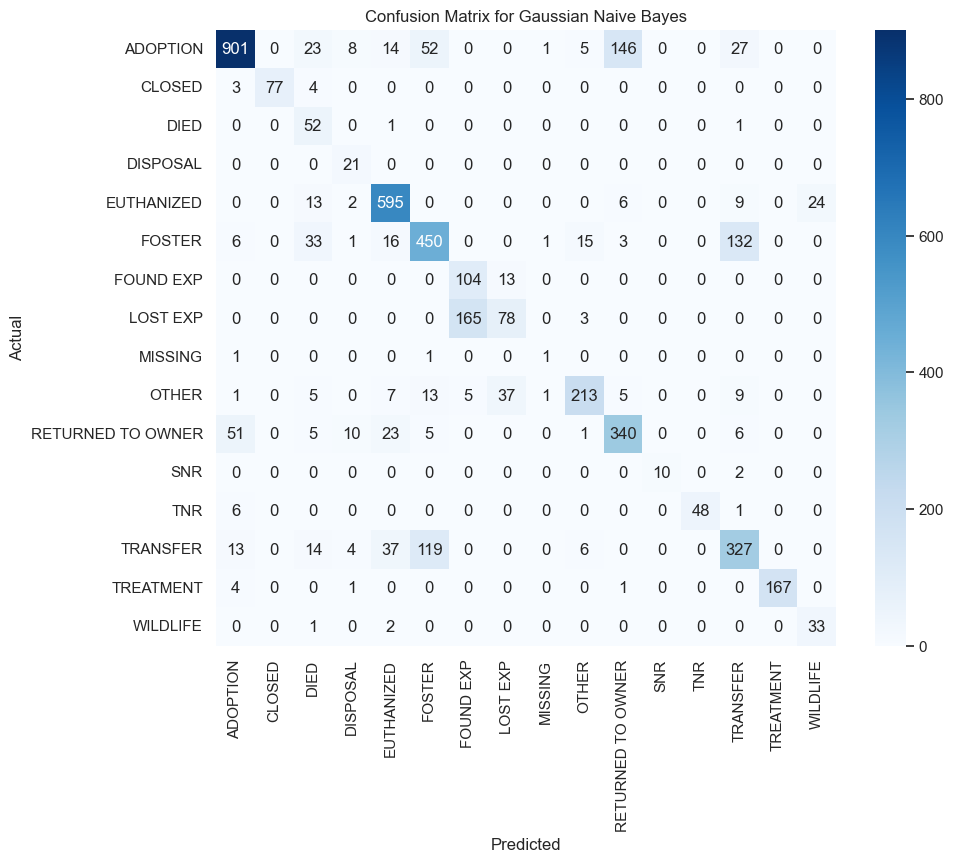

In [212]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the Gaussian Naive Bayes model and its parameter grid
gaussian_nb_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=5)),
    ('pca', PCA()),
    ('classifier', GaussianNB())
])

param_grid_gnb = {
    'pca__n_components': [20, 50, 100]
}

# Initialize and fit GridSearchCV for Gaussian Naive Bayes
print("Training GaussianNB...")
grid_search_gnb = GridSearchCV(gaussian_nb_pipeline, param_grid=param_grid_gnb, cv=5, n_jobs=-1)
grid_search_gnb.fit(X_train_encoded, y_train)

print(f"Best parameters for GaussianNB: {grid_search_gnb.best_params_}")
print(f"Best cross-validation score for GaussianNB: {grid_search_gnb.best_score_:.2f}")

# Save the best Gaussian Naive Bayes model
best_model_gnb = grid_search_gnb.best_estimator_
joblib.dump(best_model_gnb, 'GaussianNB.joblib')
print("GaussianNB model saved successfully!\n")

# Save the feature columns used in the training set
model_features = X_train_encoded.columns
joblib.dump(model_features, 'model_features.pkl')

# Save the scaler used during training
scaler = StandardScaler().fit(X_train_encoded[['Duration_of_Stay']])
joblib.dump(scaler, 'scaler.pkl')

# Evaluate the Gaussian Naive Bayes model on the test set
y_pred_gnb = best_model_gnb.predict(X_test_encoded)

# Accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"\nTest Accuracy for GaussianNB: {accuracy_gnb}")

print(f"\nClassification Report for GaussianNB:\n", classification_report(y_test, y_pred_gnb))

conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=best_model_gnb.named_steps['classifier'].classes_, yticklabels=best_model_gnb.named_steps['classifier'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()

#### Random Forest was chosen for its ability to handle high-dimensional data, robustness against overfitting, effective handling of class imbalance, and interpretability.

Training RandomForestClassifier...
Best parameters for RandomForestClassifier: {'classifier__max_depth': 20, 'classifier__n_estimators': 150, 'pca__n_components': 100}
Best cross-validation score for RandomForestClassifier: 0.88
RandomForestClassifier model saved successfully!


Test Accuracy for RandomForestClassifier: 0.8821845408500331

Classification Report for RandomForestClassifier:
                    precision    recall  f1-score   support

         ADOPTION       0.93      0.92      0.93      1177
           CLOSED       1.00      1.00      1.00        84
             DIED       1.00      0.89      0.94        54
         DISPOSAL       0.95      1.00      0.98        21
       EUTHANIZED       0.94      0.98      0.96       649
           FOSTER       0.86      0.87      0.86       657
        FOUND EXP       0.43      0.52      0.47       117
         LOST EXP       0.73      0.67      0.70       246
          MISSING       1.00      0.67      0.80         3
            OTHE

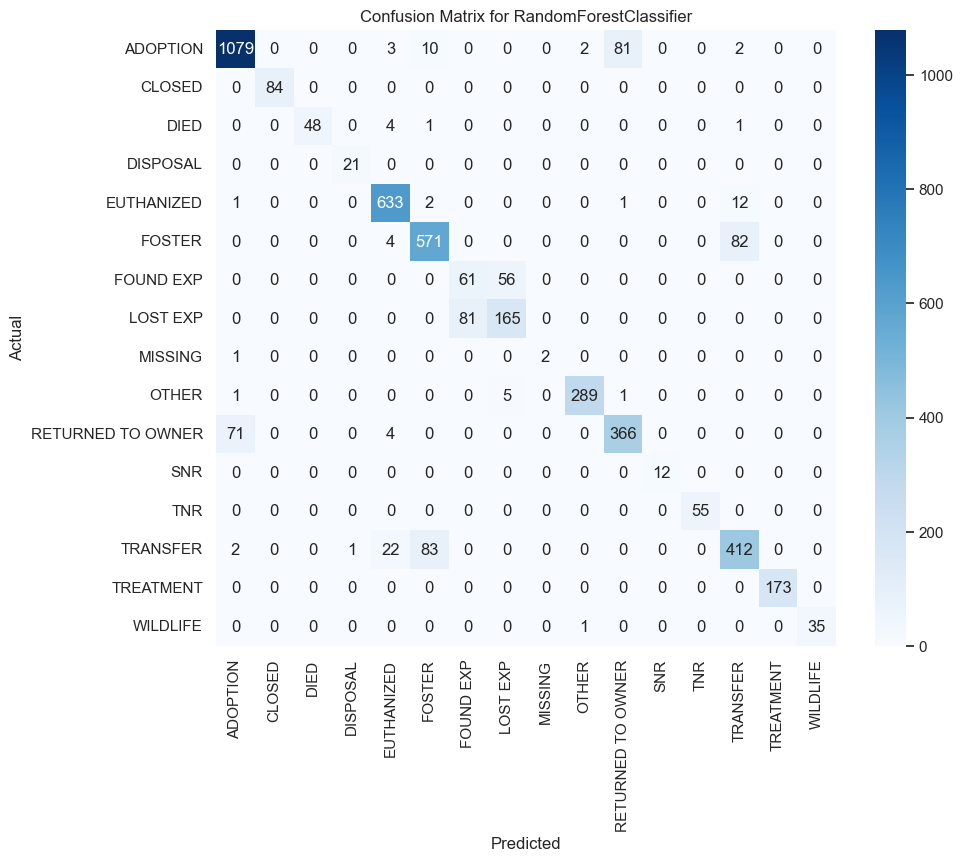

In [213]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model and its parameter grid
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=5)),  # Apply SMOTE for oversampling
    ('pca', PCA()),  # PCA without specifying n_components initially
    ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42))  # Random Forest without class_weight
])

# Simplified parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [20, 50, 100],  
    'classifier__n_estimators': [50, 100, 150],  
    'classifier__max_depth': [10, 20, None]  
}

# Initialize and fit GridSearchCV
print("Training RandomForestClassifier...")
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_encoded, y_train)

print(f"Best parameters for RandomForestClassifier: {grid_search.best_params_}")
print(f"Best cross-validation score for RandomForestClassifier: {grid_search.best_score_:.2f}")

# Save the best Random Forest model
best_model_rf = grid_search.best_estimator_
joblib.dump(best_model_rf, 'Random_Forest.joblib')
print("RandomForestClassifier model saved successfully!\n")

# Save the feature columns used in the training set
model_features = X_train_encoded.columns
joblib.dump(model_features, 'r_model_features_rf.pkl')

# Save the scaler used during training
scaler = StandardScaler().fit(X_train_encoded[['Duration_of_Stay']])
joblib.dump(scaler, 'r_scaler_rf.pkl')

# Evaluate the Random Forest model on the test set
y_pred_rf = best_model_rf.predict(X_test_encoded)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nTest Accuracy for RandomForestClassifier: {accuracy_rf}")

print(f"\nClassification Report for RandomForestClassifier:\n", classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=best_model_rf.named_steps['classifier'].classes_, yticklabels=best_model_rf.named_steps['classifier'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

### MLP classifier

Training MLPClassifier...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for MLPClassifier: {'classifier__activation': 'tanh', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__learning_rate': 'constant', 'classifier__solver': 'adam', 'pca__n_components': 100}
Best cross-validation score for MLPClassifier: 0.89
MLPClassifier model saved successfully!


Test Accuracy for MLPClassifier: 0.8857079938339573

Classification Report for MLPClassifier:
                    precision    recall  f1-score   support

         ADOPTION       0.93      0.94      0.94      1177
           CLOSED       1.00      0.99      0.99        84
             DIED       0.98      0.94      0.96        54
         DISPOSAL       0.95      0.95      0.95        21
       EUTHANIZED       0.97      0.96      0.97       649
           FOSTER       0.86      0.86      0.86       657
        FOUND EXP       0.44      0.50      0.47       117
         L

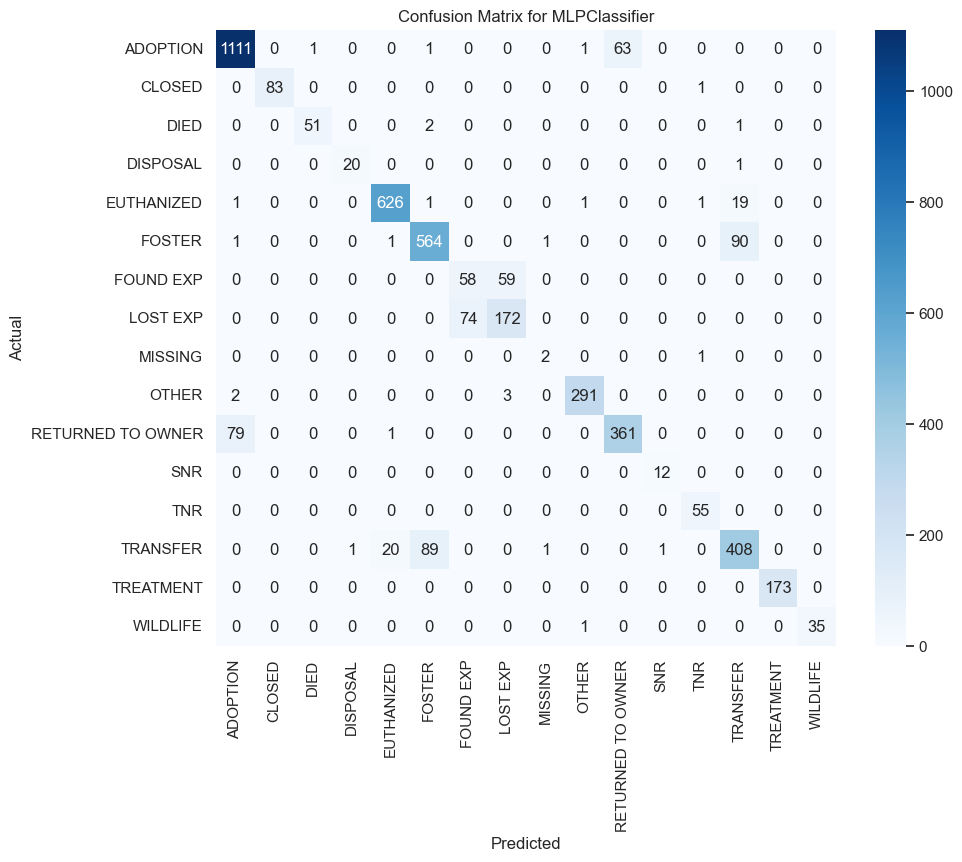

In [214]:
from sklearn.neural_network import MLPClassifier

# Define the MLPClassifier and its simplified parameter grid
mlp_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=5)),
    ('pca', PCA()),
    ('classifier', MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1))
])

param_grid_mlp = {
    'pca__n_components': [20, 50, 100],
    'classifier__hidden_layer_sizes': [(100,), (50, 50)],
    'classifier__activation': ['relu', 'tanh'],
    'classifier__solver': ['adam', 'sgd'],
    'classifier__alpha': [0.0001, 0.001],
    'classifier__learning_rate': ['constant']
}

# Initialize and fit GridSearchCV for MLPClassifier
print("Training MLPClassifier...")
grid_search_mlp = GridSearchCV(mlp_pipeline, param_grid_mlp, cv=5, n_jobs=-1, verbose=2)
grid_search_mlp.fit(X_train_encoded, y_train)

print(f"Best parameters for MLPClassifier: {grid_search_mlp.best_params_}")
print(f"Best cross-validation score for MLPClassifier: {grid_search_mlp.best_score_:.2f}")

# Save the best MLP model
best_model_mlp = grid_search_mlp.best_estimator_
joblib.dump(best_model_mlp, 'MLPClassifier.joblib')
print("MLPClassifier model saved successfully!\n")

# Save the feature columns used in the training set
model_features = X_train_encoded.columns
joblib.dump(model_features, 'mlp_model_features_mlp.pkl')

# Save the scaler used during training
scaler = StandardScaler().fit(X_train_encoded[['Duration_of_Stay']])
joblib.dump(scaler, 'scaler_mlp.pkl')

# Evaluate the MLPClassifier model on the test set
y_pred_mlp = best_model_mlp.predict(X_test_encoded)

# Accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"\nTest Accuracy for MLPClassifier: {accuracy_mlp}")

print(f"\nClassification Report for MLPClassifier:\n", classification_report(y_test, y_pred_mlp))

conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=best_model_mlp.named_steps['classifier'].classes_, yticklabels=best_model_mlp.named_steps['classifier'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLPClassifier')
plt.show()

### Logistic Regression

Training Logistic Regression...
Logistic Regression model saved successfully!


Test Accuracy for Logistic Regression: 0.8663290024223739

Classification Report for Logistic Regression:
                    precision    recall  f1-score   support

         ADOPTION       0.93      0.91      0.92      1177
           CLOSED       1.00      1.00      1.00        84
             DIED       1.00      0.98      0.99        54
         DISPOSAL       0.95      1.00      0.98        21
       EUTHANIZED       0.98      0.97      0.97       649
           FOSTER       0.88      0.72      0.80       657
        FOUND EXP       0.43      0.49      0.46       117
         LOST EXP       0.72      0.70      0.71       246
          MISSING       1.00      0.67      0.80         3
            OTHER       0.99      0.97      0.98       296
RETURNED TO OWNER       0.78      0.82      0.80       441
              SNR       1.00      1.00      1.00        12
              TNR       1.00      1.00      1

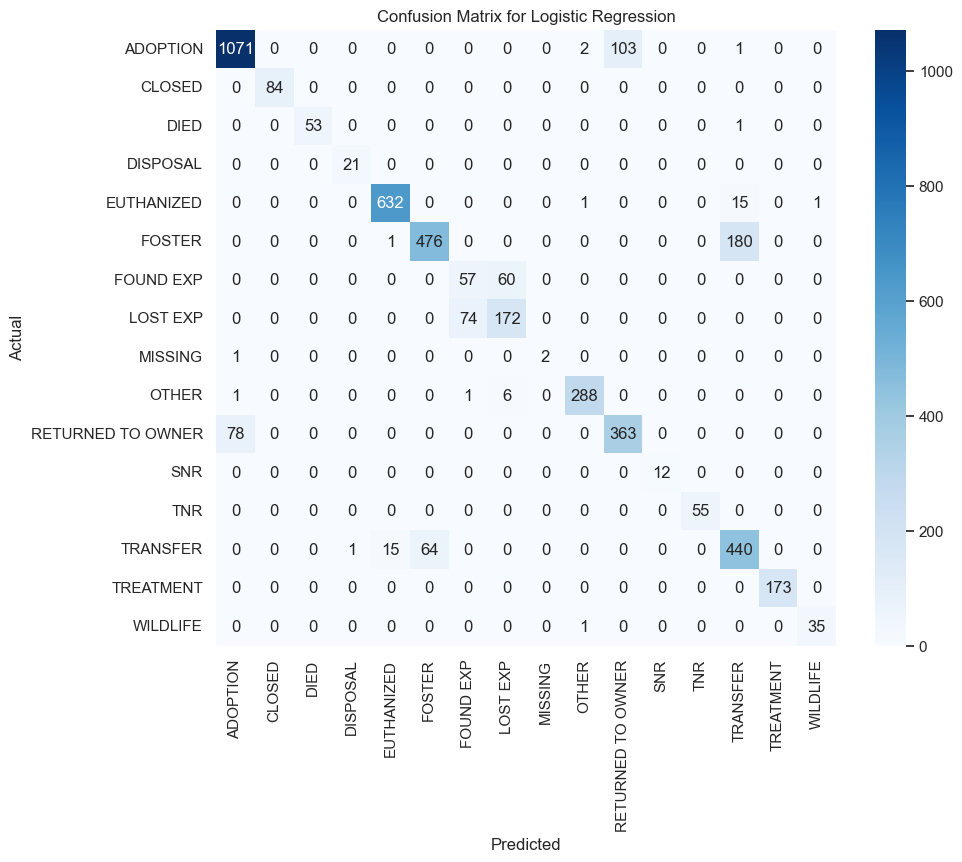

In [222]:
# Define the Logistic Regression model and its parameter grid
logistic_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=5)),
    ('classifier', LogisticRegression(solver='lbfgs', random_state=42, max_iter=1000))
])

print("Training Logistic Regression...")
logistic_pipeline.fit(X_train_encoded, y_train)

# Save the trained Logistic Regression model
joblib.dump(logistic_pipeline, 'LogisticRegression.joblib')
print("Logistic Regression model saved successfully!\n")

# Save the feature columns used in the training set
model_features = X_train_encoded.columns
joblib.dump(model_features, 'model_features_logistic.pkl')

# Save the scaler used during training
scaler = StandardScaler().fit(X_train_encoded[['Duration_of_Stay']])
joblib.dump(scaler, 'scaler_logistic.pkl')

# Evaluate the Logistic Regression model on the test set
y_pred_logistic = logistic_pipeline.predict(X_test_encoded)

# Accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"\nTest Accuracy for Logistic Regression: {accuracy_logistic}")

print(f"\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic))

# Confusion Matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=logistic_pipeline.named_steps['classifier'].classes_, yticklabels=logistic_pipeline.named_steps['classifier'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### SVM

Best parameters for SVM: {'classifier__C': 5, 'classifier__kernel': 'rbf', 'pca__n_components': 100}
Best cross-validation score for SVM: 0.88
SVM model saved successfully!


Accuracy for SVM: 0.8859282096454525

Classification Report for SVM:
                    precision    recall  f1-score   support

         ADOPTION       0.93      0.93      0.93      1177
           CLOSED       1.00      1.00      1.00        84
             DIED       1.00      0.96      0.98        54
         DISPOSAL       0.95      1.00      0.98        21
       EUTHANIZED       0.97      0.97      0.97       649
           FOSTER       0.88      0.84      0.86       657
        FOUND EXP       0.44      0.47      0.45       117
         LOST EXP       0.72      0.71      0.72       246
          MISSING       1.00      0.67      0.80         3
            OTHER       0.99      0.98      0.98       296
RETURNED TO OWNER       0.83      0.82      0.82       441
              SNR       1.00      1.00      1.

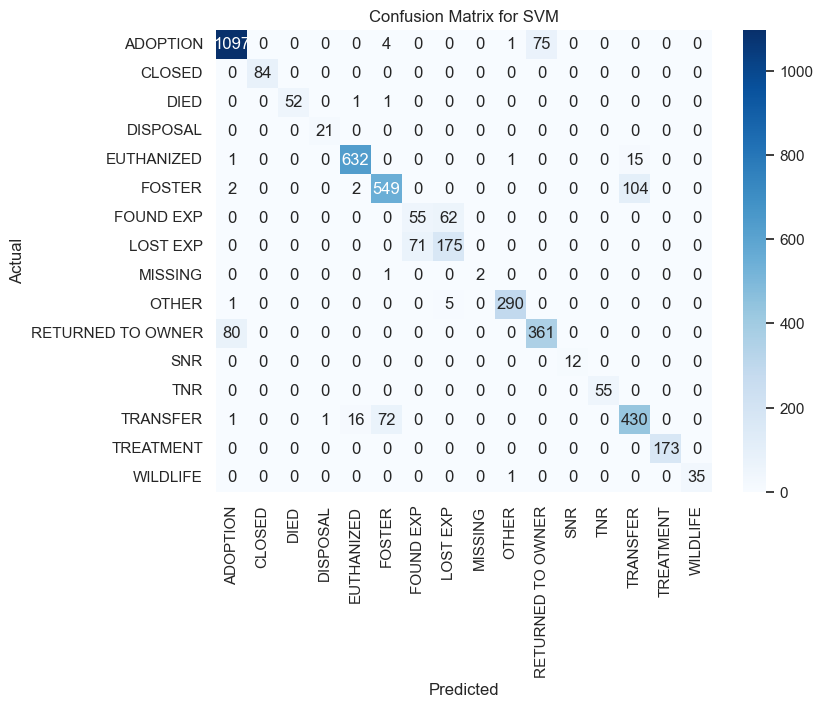

In [228]:
from sklearn.svm import SVC

# Define the SVM model and its parameter grid
svm_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=5)),
    ('pca', PCA()),
    ('classifier', SVC(probability=True, random_state=42))
])

param_grid_svm = {
    'pca__n_components': [50, 70, 100], 
    'classifier__C': [5, 10, 100],  
    'classifier__kernel': ['rbf'] 
}

# Initialize and fit GridSearchCV for SVM with StratifiedKFold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search_svm = GridSearchCV(svm_pipeline, param_grid=param_grid_svm, cv=cv, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train_encoded, y_train)

print(f"Best parameters for SVM: {grid_search_svm.best_params_}")
print(f"Best cross-validation score for SVM: {grid_search_svm.best_score_:.2f}")

# Save the best SVM model
best_model_svm = grid_search_svm.best_estimator_
joblib.dump(best_model_svm, 'SVM.joblib')
print("SVM model saved successfully!\n")

# Save the feature columns used in the training set
model_features = X_train_encoded.columns
joblib.dump(model_features, 'model_features_svm.pkl')

# Save the scaler used during training (if any)
scaler = StandardScaler().fit(X_train_encoded[['Duration_of_Stay']])
joblib.dump(scaler, 'scaler_svm.pkl')

# Evaluate the SVM model on the test set
y_pred_svm = best_model_svm.predict(X_test_encoded)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nAccuracy for SVM: {accuracy_svm}")

print(f"\nClassification Report for SVM:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search_svm.classes_, yticklabels=grid_search_svm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

### Models performance comparison

GaussianNB has the lowest overall accuracy (0.7525) and relatively lower precision, recall, and F1-scores compared to the other models. This model is not the best performer in this scenario.

RandomForestClassifier, MLPClassifier, and SVM all have very similar and high accuracies (around 0.88-0.89). Among these:

- RandomForestClassifier has an accuracy of 0.8822 with high precision and recall across most categories.
- MLPClassifier has a slightly higher accuracy (0.8857) and also performs well across all categories.
- SVM has the highest accuracy (0.8859), and its precision, recall, and F1-scores are consistently high across most categories.
- Logistic Regression performs well with an accuracy of 0.8663 but is slightly lower than the other top-performing models.

### Conclusion

Based on the provided performance metrics, SVM is the best performing model due to its highest accuracy (0.8859) and strong precision, recall, and F1-scores across most categories. Therefore, the SVM model should be chosen for the classification task.

## Thank you!

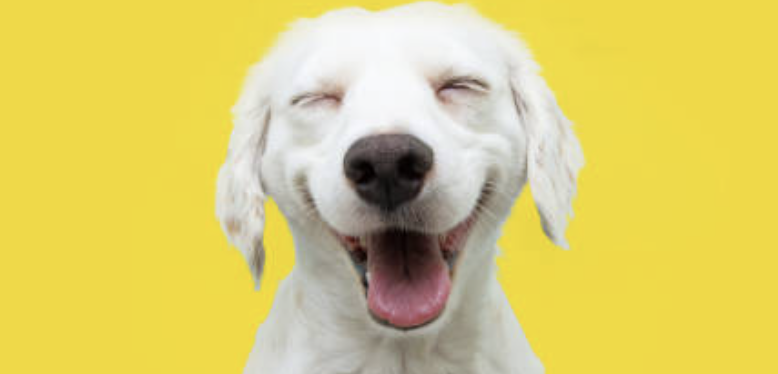